In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
cd Logistic_regression/

/home/lgi/Desktop/Logistic_regression


##  Collect data

In [3]:
titanic_data = pd.read_csv('titanic.csv')

In [4]:
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
print('number of passenger in original data :' + str(len(titanic_data.index)))

number of passenger in original data :887


##  Analyze data

<Axes: xlabel='Survived', ylabel='count'>

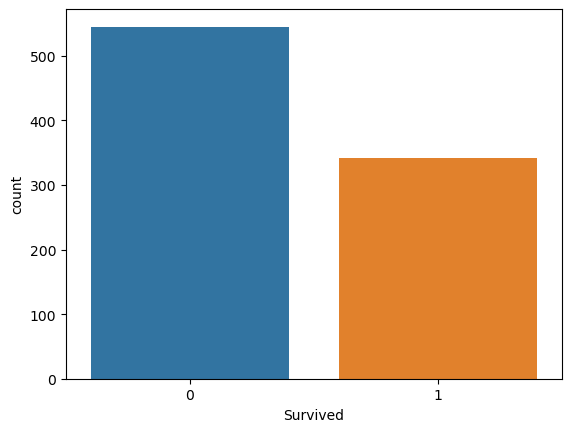

In [6]:
sns.countplot(x = 'Survived', data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

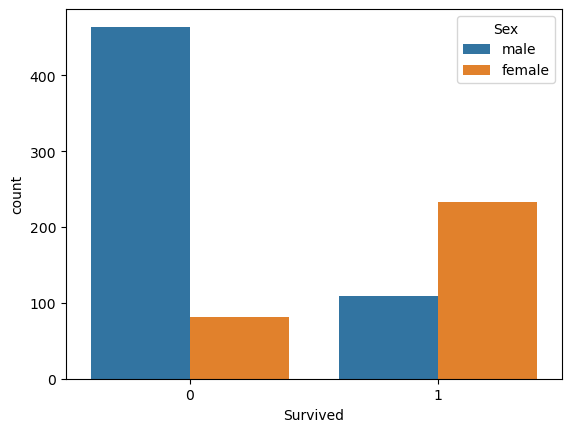

In [7]:
sns.countplot(x = 'Survived', hue="Sex", data = titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

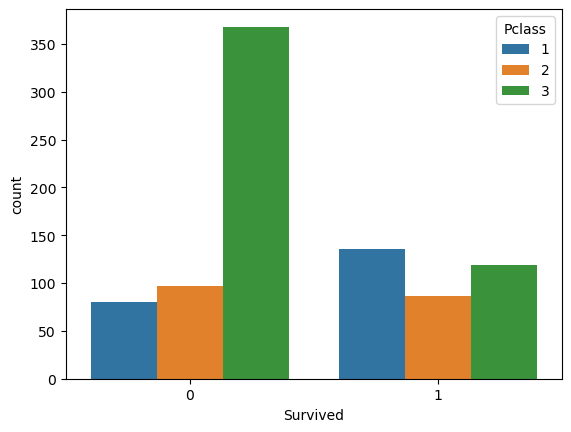

In [8]:
sns.countplot(x = 'Survived', hue="Pclass", data = titanic_data)

<Axes: ylabel='Frequency'>

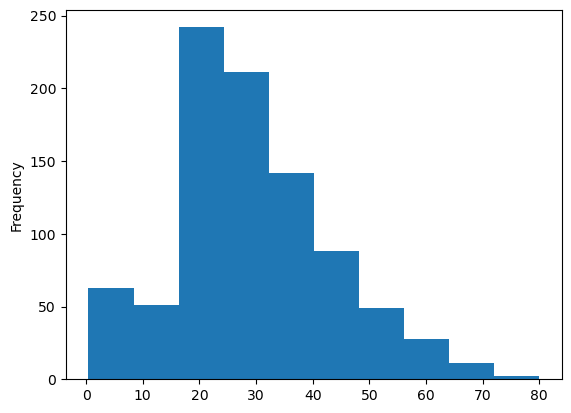

In [9]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

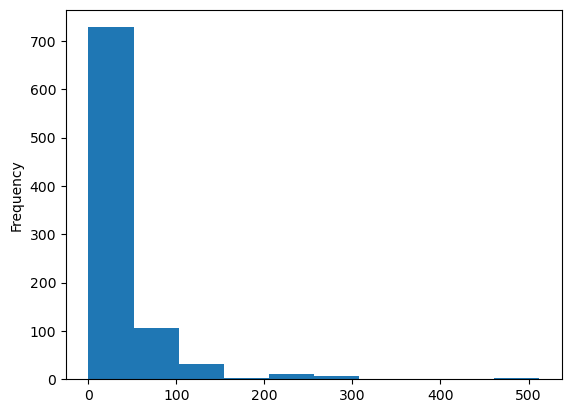

In [10]:
titanic_data["Fare"].plot.hist()

<Axes: ylabel='Frequency'>

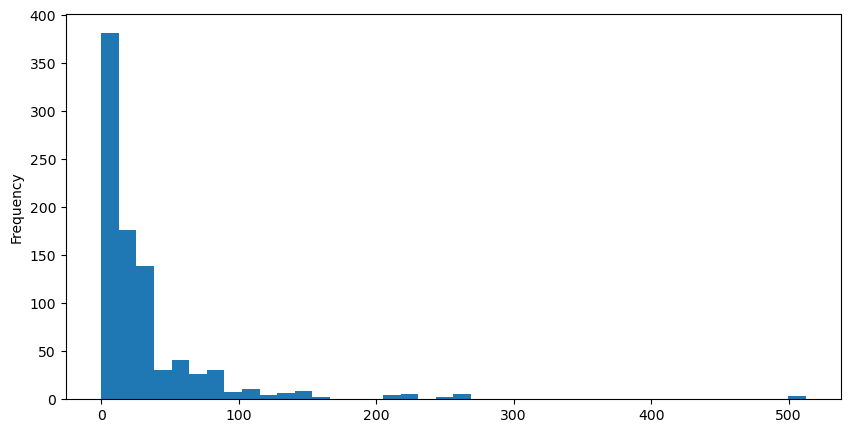

In [11]:
titanic_data["Fare"].plot.hist(bins=40, figsize  = (10,5))

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


<Axes: xlabel='Siblings/Spouses Aboard', ylabel='count'>

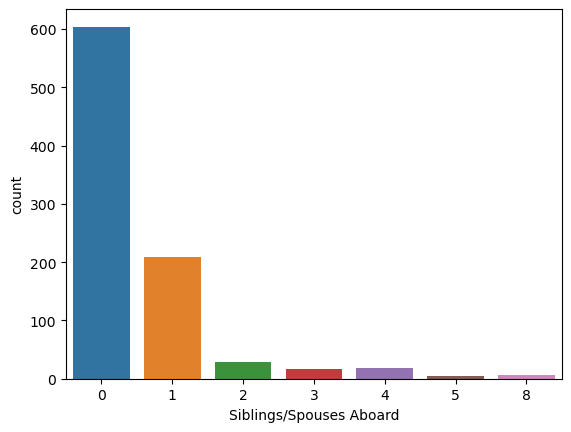

In [13]:
sns.countplot(x = 'Siblings/Spouses Aboard', data = titanic_data,)

<Axes: xlabel='Parents/Children Aboard', ylabel='count'>

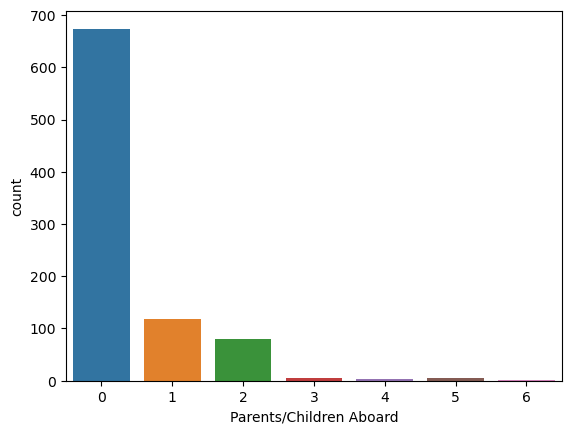

In [14]:
sns.countplot(x = 'Parents/Children Aboard', data = titanic_data,)

## Data wrangling

In [15]:
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [16]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

 No null value found

<Axes: >

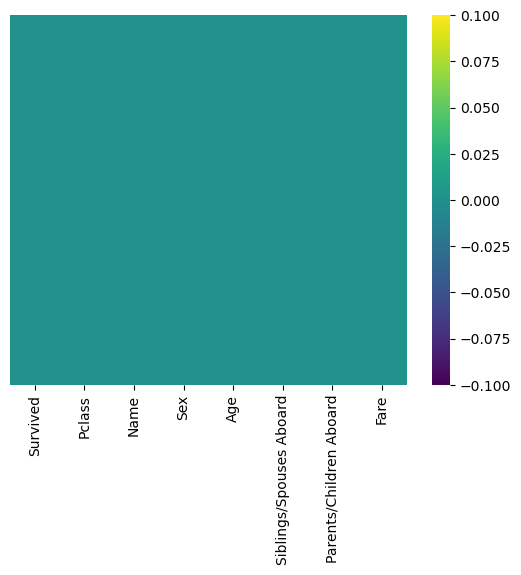

In [17]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap='viridis')

showing no missing values in the data

<Axes: xlabel='Pclass', ylabel='Age'>

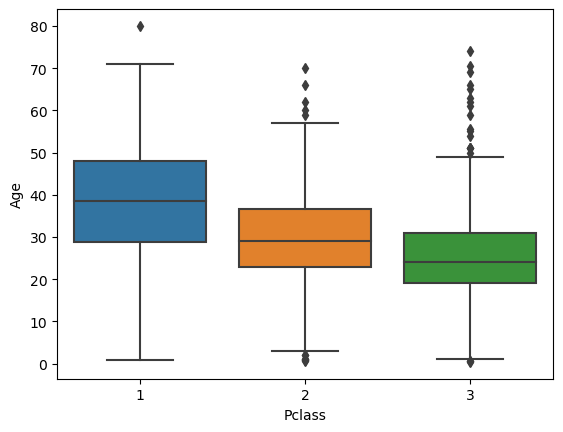

In [18]:
#considering the data has some missing values
sns.boxplot(x = "Pclass", y ="Age", data = titanic_data)

In [19]:
#Dropping unneccesary data from the columns

titanic_data.drop("Name", axis= 1, inplace= True)


#inplace=True: This parameter is set to True to modify the titanic_data DataFrame in place, 
#meaning the original DataFrame is changed instead of creating a new one

In [20]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [21]:
# to drop all the value which contain Nan

titanic_data.dropna(inplace= True)

<Axes: >

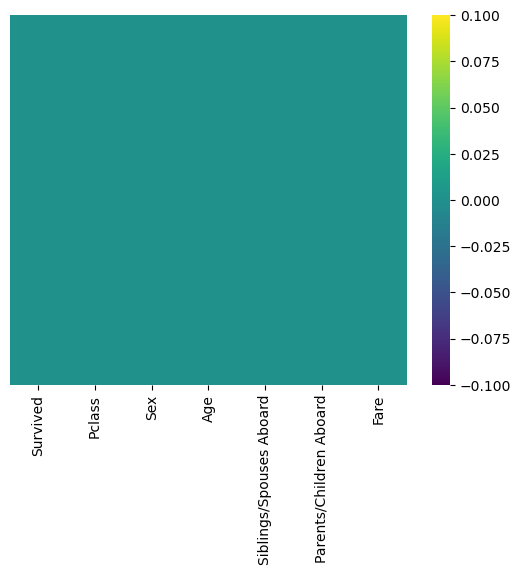

In [22]:
#it won't change 

sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap='viridis')

In [23]:
#again check the null value

titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [25]:
sex = pd.get_dummies(titanic_data["Sex"], drop_first= True)

sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first= True)
Pcl.head()

#The rows having 0 values in both 2 and 3 column will be considered in 1st class passenger category.

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
#axis=1: The axis parameter is set to 1 to specify that we want to drop columns.
# The value 1 indicates the column axis, while 0 would refer to the row axis.

titanic_data = pd.concat([titanic_data, sex, Pcl], axis=1)

SyntaxError: invalid syntax (947892541.py, line 3)

In [28]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [29]:
#dropping unneccessary data
titanic_data.drop(['Sex', 'Pclass'], axis=1, inplace= True)

titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [55]:
titanic_data.rename(columns = {'Siblings/Spouses Aboard':'Sisb'}, inplace = True)
titanic_data.rename(columns = {'Siblings/Spouses Aboard':'Sisb'}, inplace = True)

titanic_data

,Survived,Age,Sisb,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
882,0,27.0,0,0,13.0000,1,1,0
883,1,19.0,0,0,30.0000,0,0,0
884,0,7.0,1,2,23.4500,0,0,1
885,1,26.0,0,0,30.0000,1,0,0


## Train and testing data 

In [89]:
X = titanic_data.drop("Survived", axis=1) #Independent variable
y = titanic_data["Survived"] # dependent variable

X.columns = X.columns.astype(str) # to covert int/float into str

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
logmodel = LogisticRegression()

In [93]:
logmodel.fit(X_train, y_train)

/home/lgi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
prediction = logmodel.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81       162\n           1       0.70      0.70      0.70       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, prediction)

array([[131,  31],
       [ 31,  74]])

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test, prediction)

0.7677902621722846

pretty good


# SUV price prediction 

In [101]:
dataset_2 = pd.read_csv('suv_data.csv')

In [102]:
dataset_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [105]:
#iloc, used in pandas for selection based indexing

X = dataset_2.iloc[:, [2,3]].values
y = dataset_2.iloc[:,[4]].values

In [107]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [112]:
from sklearn.preprocessing import StandardScaler #to scale down the data values

In [113]:
sc = StandardScaler() 

In [114]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [118]:
from sklearn.linear_model import  LogisticRegression

NameError: name 'ravel' is not defined

In [119]:
classifier = LogisticRegression(random_state=0)

In [126]:
classifier.fit(X_train, y_train)

/home/lgi/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [127]:
y_pred = classifier.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test, y_pred)*100

89.0

89% accuracy